In [ ]:
import time

start_time = time.time()

In [ ]:
import tensorflow as tf

In [ ]:
#!pip install --upgrade kagglehub
import kagglehub

dataset_path = kagglehub.dataset_download("birdy654/cifake-real-and-ai-generated-synthetic-images")

print("Path to dataset files:", dataset_path)

100%|██████████| 105M/105M [00:02<00:00, 40.0MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/versions/3


In [ ]:
import os
import kagglehub

# dataset_path = kagglehub.dataset_download("birdy654/cifake-real-and-ai-generated-synthetic-images")

# Show path
print("Path to dataset files:", dataset_path)

# Create directory dataset 'train'
base_dir = os.path.join(dataset_path, 'train')

# Check directory
if os.path.exists(base_dir):
    print("Daftar file/folder dalam dataset:")
    print(os.listdir(base_dir))
else:
    print(f"Direktori {base_dir} tidak ditemukan.")


Path to dataset files: /root/.cache/kagglehub/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/versions/3
Daftar file/folder dalam dataset:
['FAKE', 'REAL']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Process image
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=35,
                    zoom_range=0.2,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.2)

validation_datagen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split=0.2)

In [ ]:
# Create generator and show data division
train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical',
        subset='training')

validation_generator = validation_datagen.flow_from_directory(
        base_dir,
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical',
        subset='validation',
        shuffle=False)

Found 80000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16

# Initialize VGG16 without pretrained weights
base_model = VGG16(input_shape=(32, 32, 3), include_top=False, weights=None)

for layer in base_model.layers:
    layer.trainable = True

# Create flattening and fully connected layer
x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(4096, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(4096, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(2, activation='softmax')(x)

# Combine
model = tf.keras.Model(inputs=base_model.input, outputs=outputs)


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │       2,101,248 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 33,605,442 (128.19 MB)

 Trainable params: 33,605,442 (128.19 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.models import load_model
import numpy as np
import os

# Custom callback by val accuracy and its gap with train accuracy
class SaveBestModelByAccDifference(Callback):
    def __init__(self, filepath, monitor='val_accuracy', max_diff=0.05, verbose=1):
        super(SaveBestModelByAccDifference, self).__init__()
        self.filepath = filepath
        self.monitor = monitor
        self.max_diff = max_diff
        self.verbose = verbose
        self.best_val_acc = -np.Inf  # To track the best validation accuracy
        self.best_epoch = -1  # Track the best epoch

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        val_acc = logs.get('val_accuracy', 0)
        train_acc = logs.get('accuracy', 0)

        # Ensure valid values
        if val_acc is not None and train_acc is not None:
            acc_diff = abs(val_acc - train_acc)
            # Check conditions for saving
            if val_acc > self.best_val_acc and acc_diff <= self.max_diff:
                self.best_val_acc = val_acc
                self.best_epoch = epoch + 1  # Save 1-based epoch
                try:
                    self.model.save(self.filepath, overwrite=True)
                    if self.verbose > 0:
                        print(f"\nEpoch {epoch + 1}: Validation accuracy improved to {val_acc:.4f} with acceptable difference ({acc_diff:.4f}). Model saved.")
                except Exception as e:
                    print(f"Error saving model at epoch {epoch + 1}: {e}")

# Set EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=250, restore_best_weights=True)

# Create path to save best model
checkpoint_path = "best_model_with_acc_diff.keras"
# Custom checkpoint callback
custom_checkpoint = SaveBestModelByAccDifference(
    filepath=checkpoint_path,
    monitor="val_accuracy",
    max_diff=0.05,  # Maximum difference of 5%
    verbose=1
)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(0.00001), metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=156,
    epochs=400,
    validation_data=validation_generator,
    validation_steps=78,
    verbose=2,
    callbacks=[early_stopping, custom_checkpoint]
)

# Check if the best model exists
if os.path.exists(checkpoint_path):
    best_model = load_model(checkpoint_path)
    print("Loaded model path:", checkpoint_path)

    # Get best epoch and validation accuracy from the custom callback
    best_epoch = custom_checkpoint.best_epoch
    val_accuracy = custom_checkpoint.best_val_acc
    print(f"Best epoch: {best_epoch}, Best validation accuracy: {val_accuracy:.4f}")

    # Get train accuracy from the history object
    train_accuracy = history.history['accuracy'][best_epoch - 1]  # Convert 1-based to 0-based index
    print(f"Train accuracy at best epoch: {train_accuracy:.4f}")
else:
    print("No model was saved with the specified conditions.")


Epoch 1/400


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


156/156 - 20s - 130ms/step - accuracy: 0.5178 - loss: 0.6921 - val_accuracy: 0.0000e+00 - val_loss: 0.7783
Epoch 2/400
156/156 - 8s - 48ms/step - accuracy: 0.5813 - loss: 0.6721 - val_accuracy: 0.9639 - val_loss: 0.3473
Epoch 3/400
156/156 - 8s - 53ms/step - accuracy: 0.6833 - loss: 0.5890 - val_accuracy: 0.9227 - val_loss: 0.2956
Epoch 4/400
156/156 - 7s - 48ms/step - accuracy: 0.7099 - loss: 0.5546 - val_accuracy: 0.9499 - val_loss: 0.2535
Epoch 5/400
156/156 - 8s - 53ms/step - accuracy: 0.7137 - loss: 0.5403 - val_accuracy: 0.3778 - val_loss: 0.9820
Epoch 6/400
156/156 - 7s - 47ms/step - accuracy: 0.7398 - loss: 0.5178 - val_accuracy: 0.6102 - val_loss: 0.6202
Epoch 7/400
156/156 - 7s - 48ms/step - accuracy: 0.7372 - loss: 0.5083 - val_accuracy: 0.5693 - val_loss: 0.7719
Epoch 8/400
156/156 - 9s - 59ms/step - accuracy: 0.7554 - loss: 0.4937 - val_accuracy: 0.6426 - val_loss: 0.6535
Epoch 9/400
156/156 - 6s - 38ms/step - accuracy: 0.7650 - loss: 0.4786 - val_accuracy: 0.4688 - val_lo

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


156/156 - 9s - 57ms/step - accuracy: 0.7776 - loss: 0.4669 - val_accuracy: 0.9639 - val_loss: 0.1708
Epoch 11/400
156/156 - 8s - 49ms/step - accuracy: 0.7913 - loss: 0.4456 - val_accuracy: 0.9531 - val_loss: 0.1566
Epoch 12/400
156/156 - 8s - 51ms/step - accuracy: 0.8011 - loss: 0.4339 - val_accuracy: 0.9760 - val_loss: 0.0982
Epoch 13/400
156/156 - 8s - 52ms/step - accuracy: 0.7863 - loss: 0.4440 - val_accuracy: 0.9239 - val_loss: 0.2077
Epoch 14/400
156/156 - 7s - 46ms/step - accuracy: 0.8061 - loss: 0.4195 - val_accuracy: 0.5256 - val_loss: 1.1866
Epoch 15/400
156/156 - 8s - 52ms/step - accuracy: 0.8203 - loss: 0.3986 - val_accuracy: 0.7188 - val_loss: 0.6453
Epoch 16/400
156/156 - 7s - 44ms/step - accuracy: 0.8179 - loss: 0.4039 - val_accuracy: 0.6887 - val_loss: 0.6514
Epoch 17/400
156/156 - 1s - 7ms/step - accuracy: 0.8438 - loss: 0.3495 - val_accuracy: 0.6675 - val_loss: 0.6927
Epoch 18/400
156/156 - 15s - 96ms/step - accuracy: 0.8343 - loss: 0.3817 - val_accuracy: 0.4688 - val_

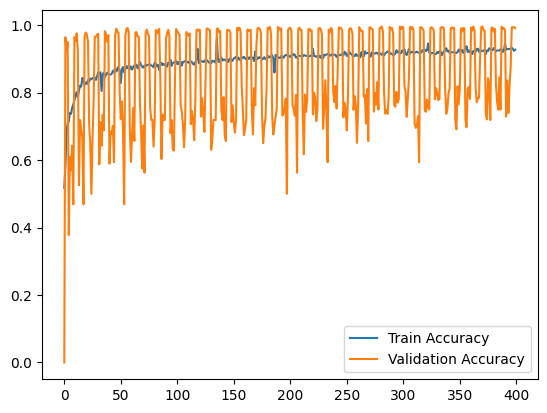

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

Saving DALL·E 2024-09-26 14.55.17 - A conceptual illustration representing science based on logic and reason, not emotions or feelings. The image features a balanced scale_ one side with.webp to DALL·E 2024-09-26 14.55.17 - A conceptual illustration representing science based on logic and reason, not emotions or feelings. The image features a balanced scale_ one side with.webp


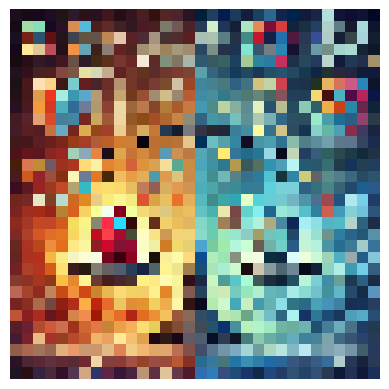

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
DALL·E 2024-09-26 14.55.17 - A conceptual illustration representing science based on logic and reason, not emotions or feelings. The image features a balanced scale_ one side with.webp
Predicted class: REAL


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload ()

for fn in uploaded.keys():
  path = fn

  # Set and show uploaded image
  img = image.load_img(path, target_size=(32,32))
  imgplot = plt.imshow(img)
  plt.axis('off')
  plt.show()

  # Convert to array
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  # Predict classes
  classes = best_model.predict(images, batch_size=10)

  # Use np.argmax to get class index with highest probability
  predicted_class_index = np.argmax(classes, axis=1)[0]

  print(fn)

  # Set FAKE = 0, REAL = 1
  class_names = ['FAKE', 'REAL']

  if predicted_class_index < len(class_names):
      print(f'Predicted class: {class_names[predicted_class_index]}')
  else:
      print('Predicted class index out of range.')

In [ ]:
final_train_accuracy = (np.mean(train_accuracy))*100
final_val_accuracy = (np.mean(val_accuracy))*100
end_time = time.time()
elapsed_time = (end_time - start_time)/60

In [ ]:
print('Train ACCURACY =:', final_train_accuracy, '%')
print('VAL ACCURACY =:', final_val_accuracy, '%')
print("Runtime:", elapsed_time, "minutes")

Train ACCURACY =: 96.09375 %
VAL ACCURACY =: 98.87820482254028 %
Runtime: 65.30390936136246 minutes


In [ ]:
# Convert model best_model.keras to format TensorFlow Lite (.tflite)
converter = tf.lite.TFLiteConverter.from_keras_model(best_model)
tflite_model = converter.convert()

# Save model with format .tflite to file
tflite_model_path = "best_model.tflite"
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)

print(f"Model has been successfully converted to TFLite and saved at: {tflite_model_path}")

Saved artifact at '/tmp/tmp7gy3hays'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  136654855138544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136654855128688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136654855142416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136655631414752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136654855131152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136655631407360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136655631407184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136655631409296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136655631407008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136654855082000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136654855088688: 

In [ ]:
# Download file .tflite
from google.colab import files
files.download(tflite_model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>